# Breast Cancer Diagnosis 

### Classify cells as benign or malignant based on cell nucleus features

In [123]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
import pydotplus
from IPython.display import Image
from sklearn import tree
from sklearn.model_selection import StratifiedKFold
from sklearn.grid_search import GridSearchCV

In [100]:
# data = pd.read_csv("data.csv")
data = pd.read_csv('datadata.csv', na_values=['NA'])

# Preview data

In [101]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [102]:
data = data.drop(["id", "Unnamed: 32"], 1)
data.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [103]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

### Select "mean" measures as the features

In [104]:
features = list(data.columns[1:11])
print("{} features:".format(len(features)))
print(features)

10 features:
['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']


# Explore features

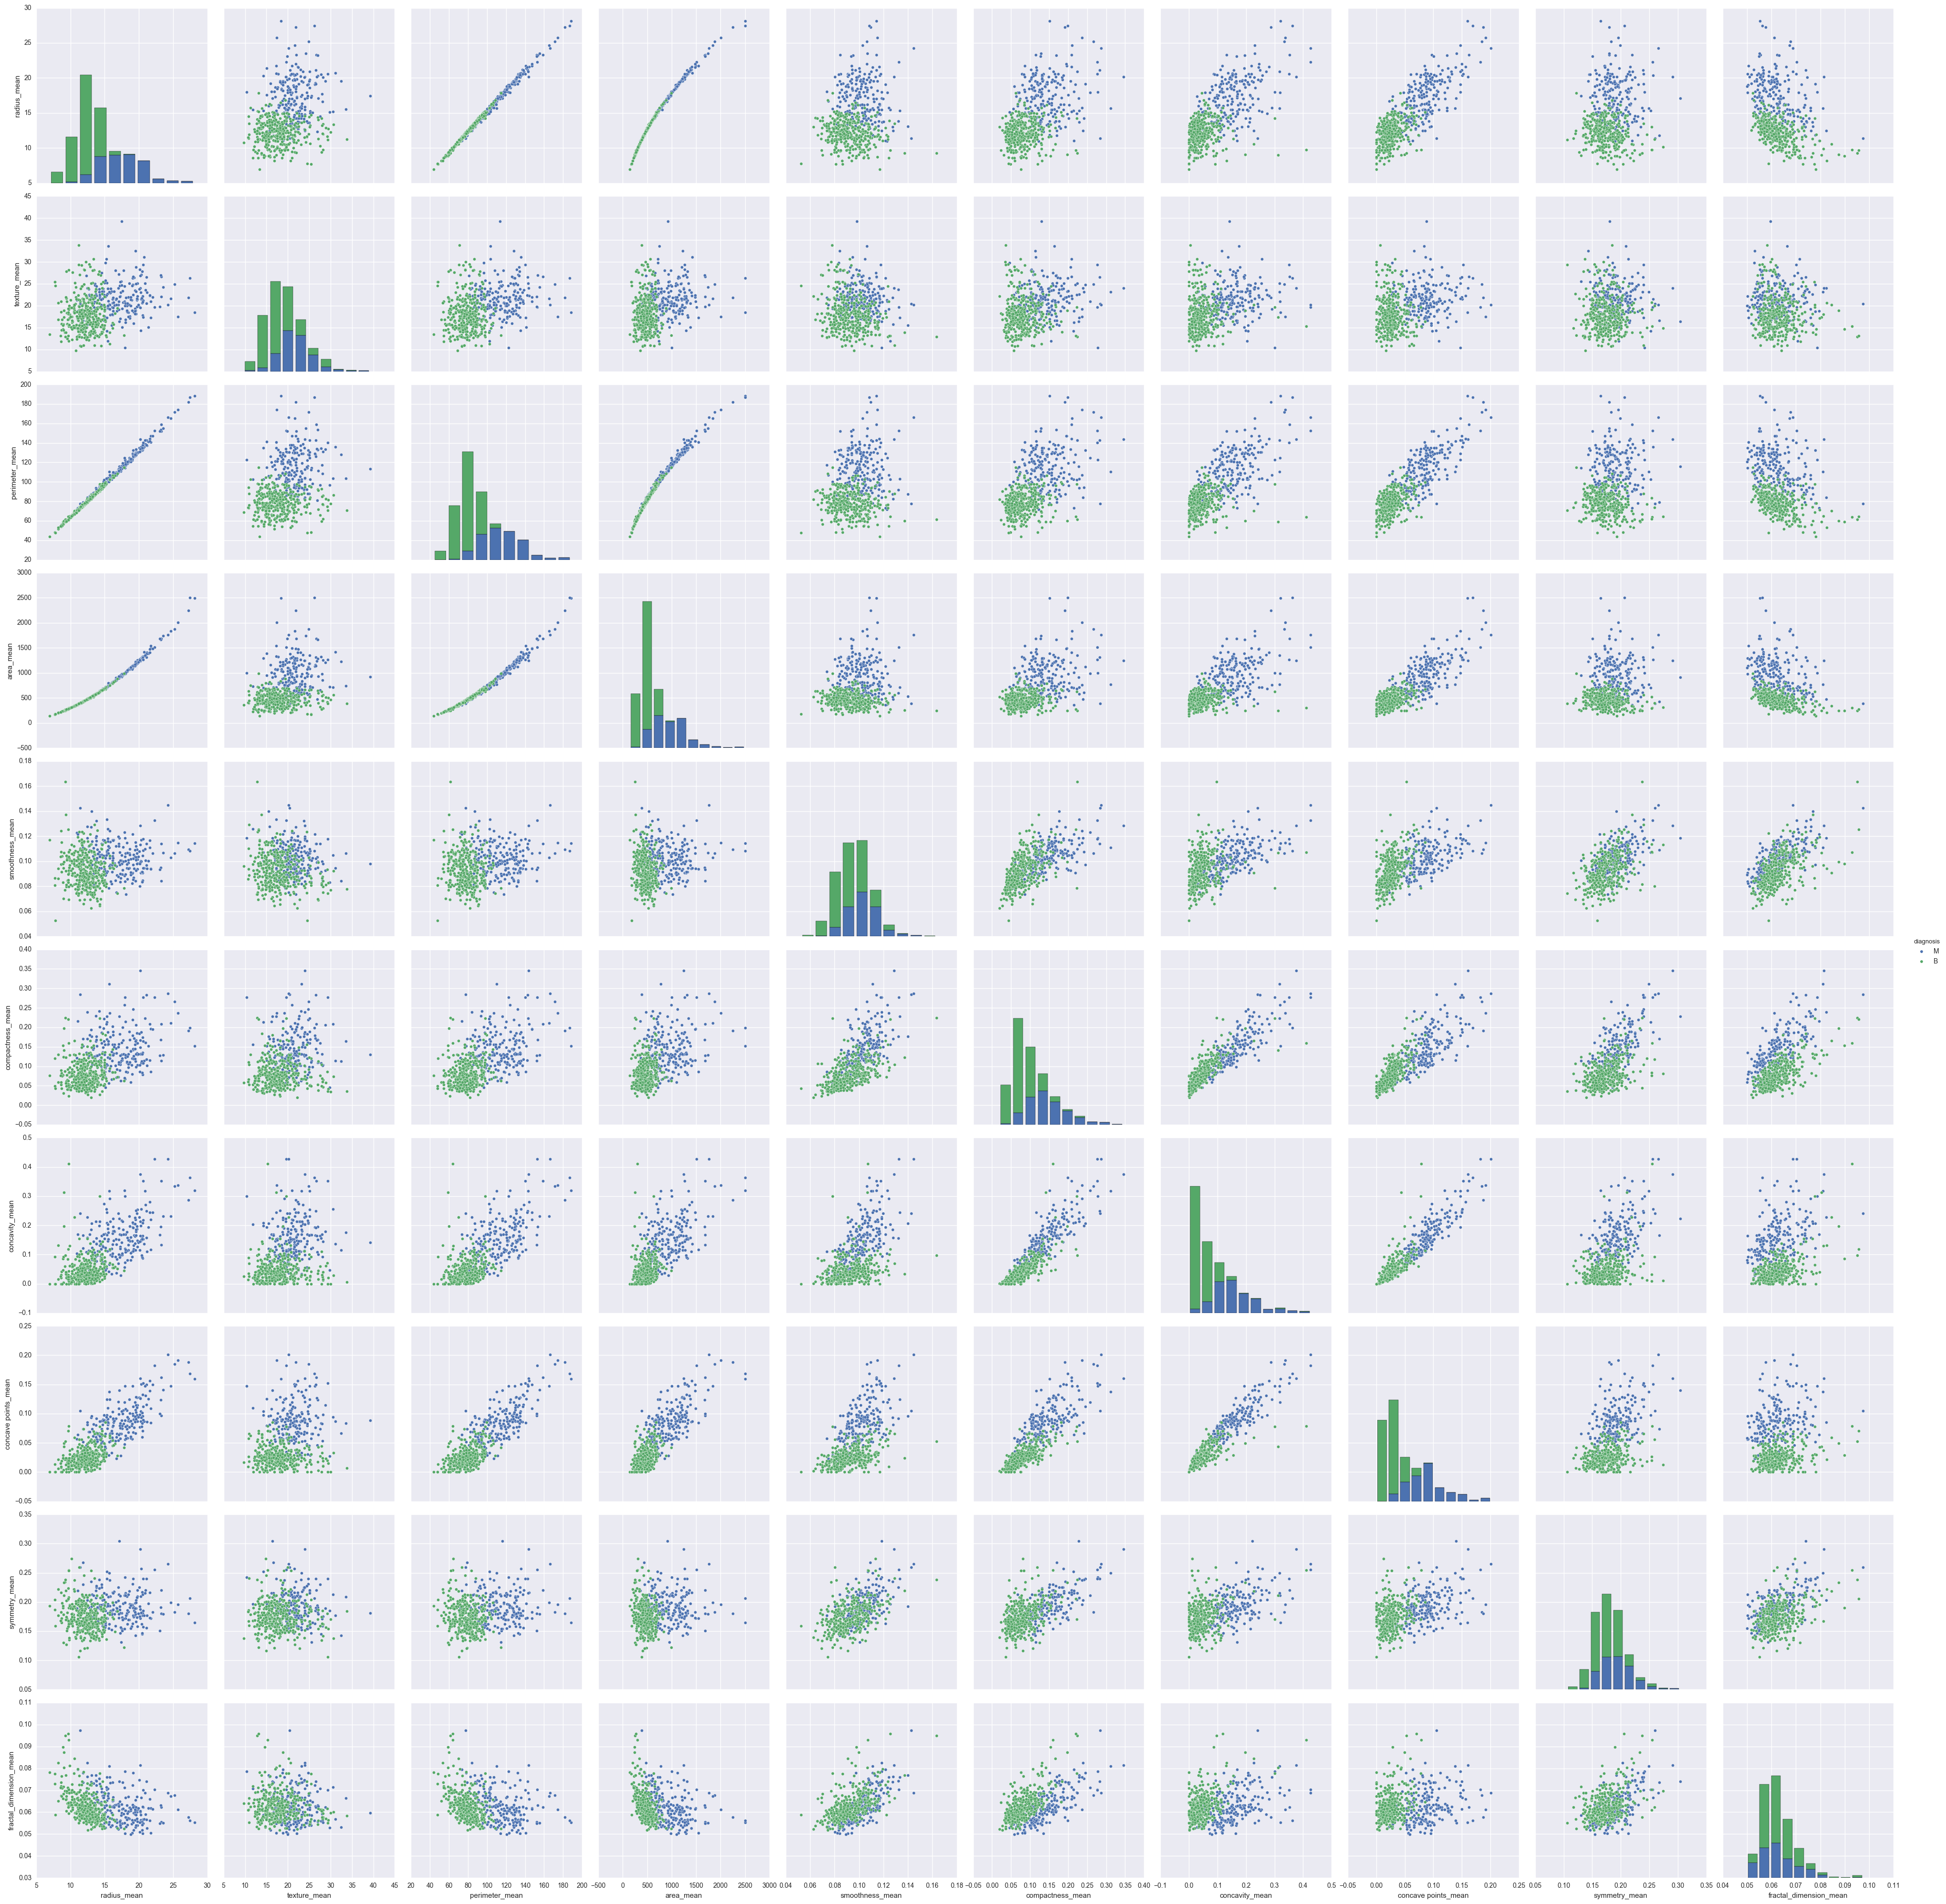

In [105]:
# Show scatterplots of every 10 x 10
sb.pairplot(data, vars=features, hue="diagnosis", size=4)

### There appear to be three features that are strongly correlated

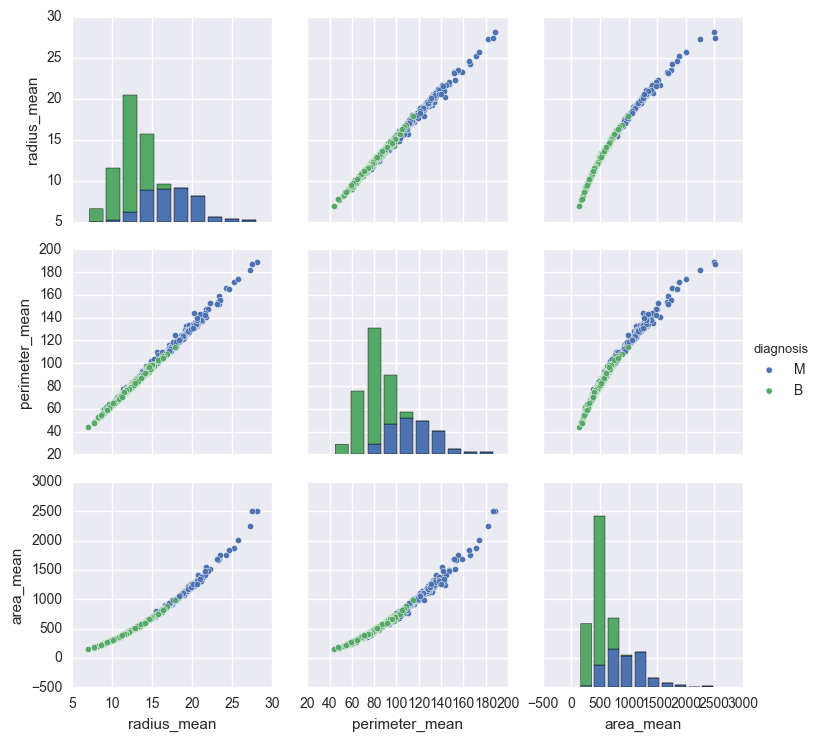

In [106]:
area_features = ['radius_mean', 'perimeter_mean', 'area_mean']
sb.pairplot(data, vars=area_features, hue="diagnosis")

#### The perimeter and area are both functions of the radius
#### Specifically, 
- perimeter ~ radius_mean 
- area ~ radius_mean^2

#### This is as expected, so let's carry on

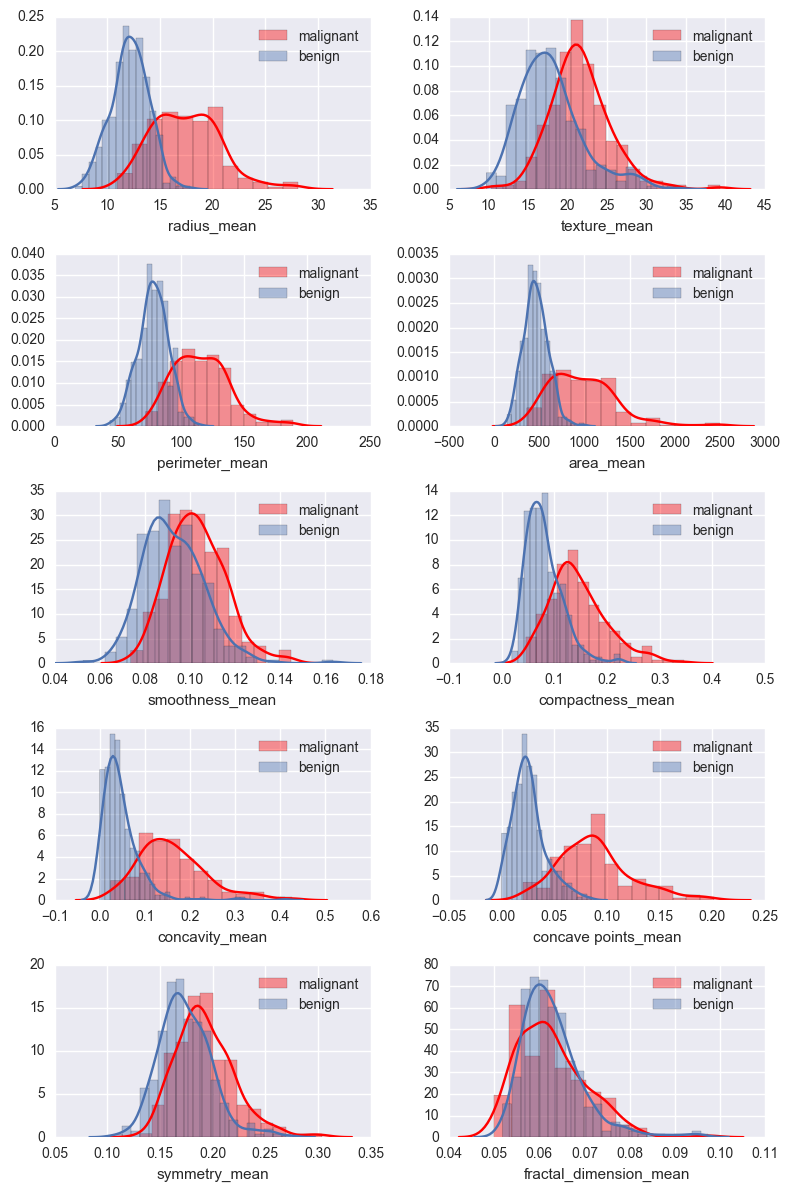

In [109]:
fig, ax = plt.subplots(5, 2, figsize=(8,12))
axes = ax.ravel()
for i, feature in enumerate(features):
    sb.distplot(m[feature], label="malignant", ax=axes[i], color='r')
    sb.distplot(b[feature], label="benign", ax=axes[i])
    axes[i].legend()
plt.tight_layout()

#### The data appears normally distributed with visual differences in distributions based on diagnosis- a good sign for classification!

# Parameter optimization and cross-validation

In [ ]:
inputs = data[features].values
diagnoses = data["diagnosis"].values

#### This function takes in the model and parameter grid and returns the best model using 10 k-fold cross-validation

In [153]:
def optimize_model(model, param_grid):
    grid_search = GridSearchCV(model,
                              param_grid=param_grid,
                              cv=10)
    grid_search.fit(inputs, diagnoses)
    print("Accuracy: {}".format(grid_search.best_score_))
    print("Best params: {}".format(grid_search.best_params_))
    return grid_search.best_estimator_

# Logistic Regression

In [189]:
results = {}

In [183]:
parameter_grid = {'C': np.logspace(1, 5, 50)}
lr = optimize_model(LogisticRegression(), parameter_grid)

Accuracy: 0.9279437609841827
Best params: {'C': 202.35896477251555}


In [184]:
lr.fit(X_train, y_train)

LogisticRegression(C=202.35896477251555, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [190]:
score = lr.score(X_test,y_test)
print(score)
results["Logistic Regression"] = score

0.957446808511


# Support Vector Machine

In [193]:
parameter_grid = {'C': np.logspace(-5, 5, 10),
                  'kernel': ["rbf", "linear"]}
svc = optimize_model(SVC(), parameter_grid)

Accuracy: 0.9209138840070299
Best params: {'C': 46.415888336127821, 'kernel': 'linear'}


In [194]:
svc.fit(X_train, y_train)

SVC(C=46.415888336127821, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [241]:
score = svc.score(X_test,y_test)
print(score)
results["SVM"] = score

0.946808510638


# Decision Trees

In [212]:
parameter_grid = {'max_depth': list(range(1,30)),
                  'max_features': list(range(1,11))}
dtc = optimize_model(tree.DecisionTreeClassifier(), parameter_grid)

Accuracy: 0.9314586994727593
Best params: {'max_features': 5, 'max_depth': 16}


In [213]:
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=16,
            max_features=5, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [214]:
score = dtc.score(X_test,y_test)
print(score)
results["Decision Tree"] = score

0.914893617021


### Visualize decision tree

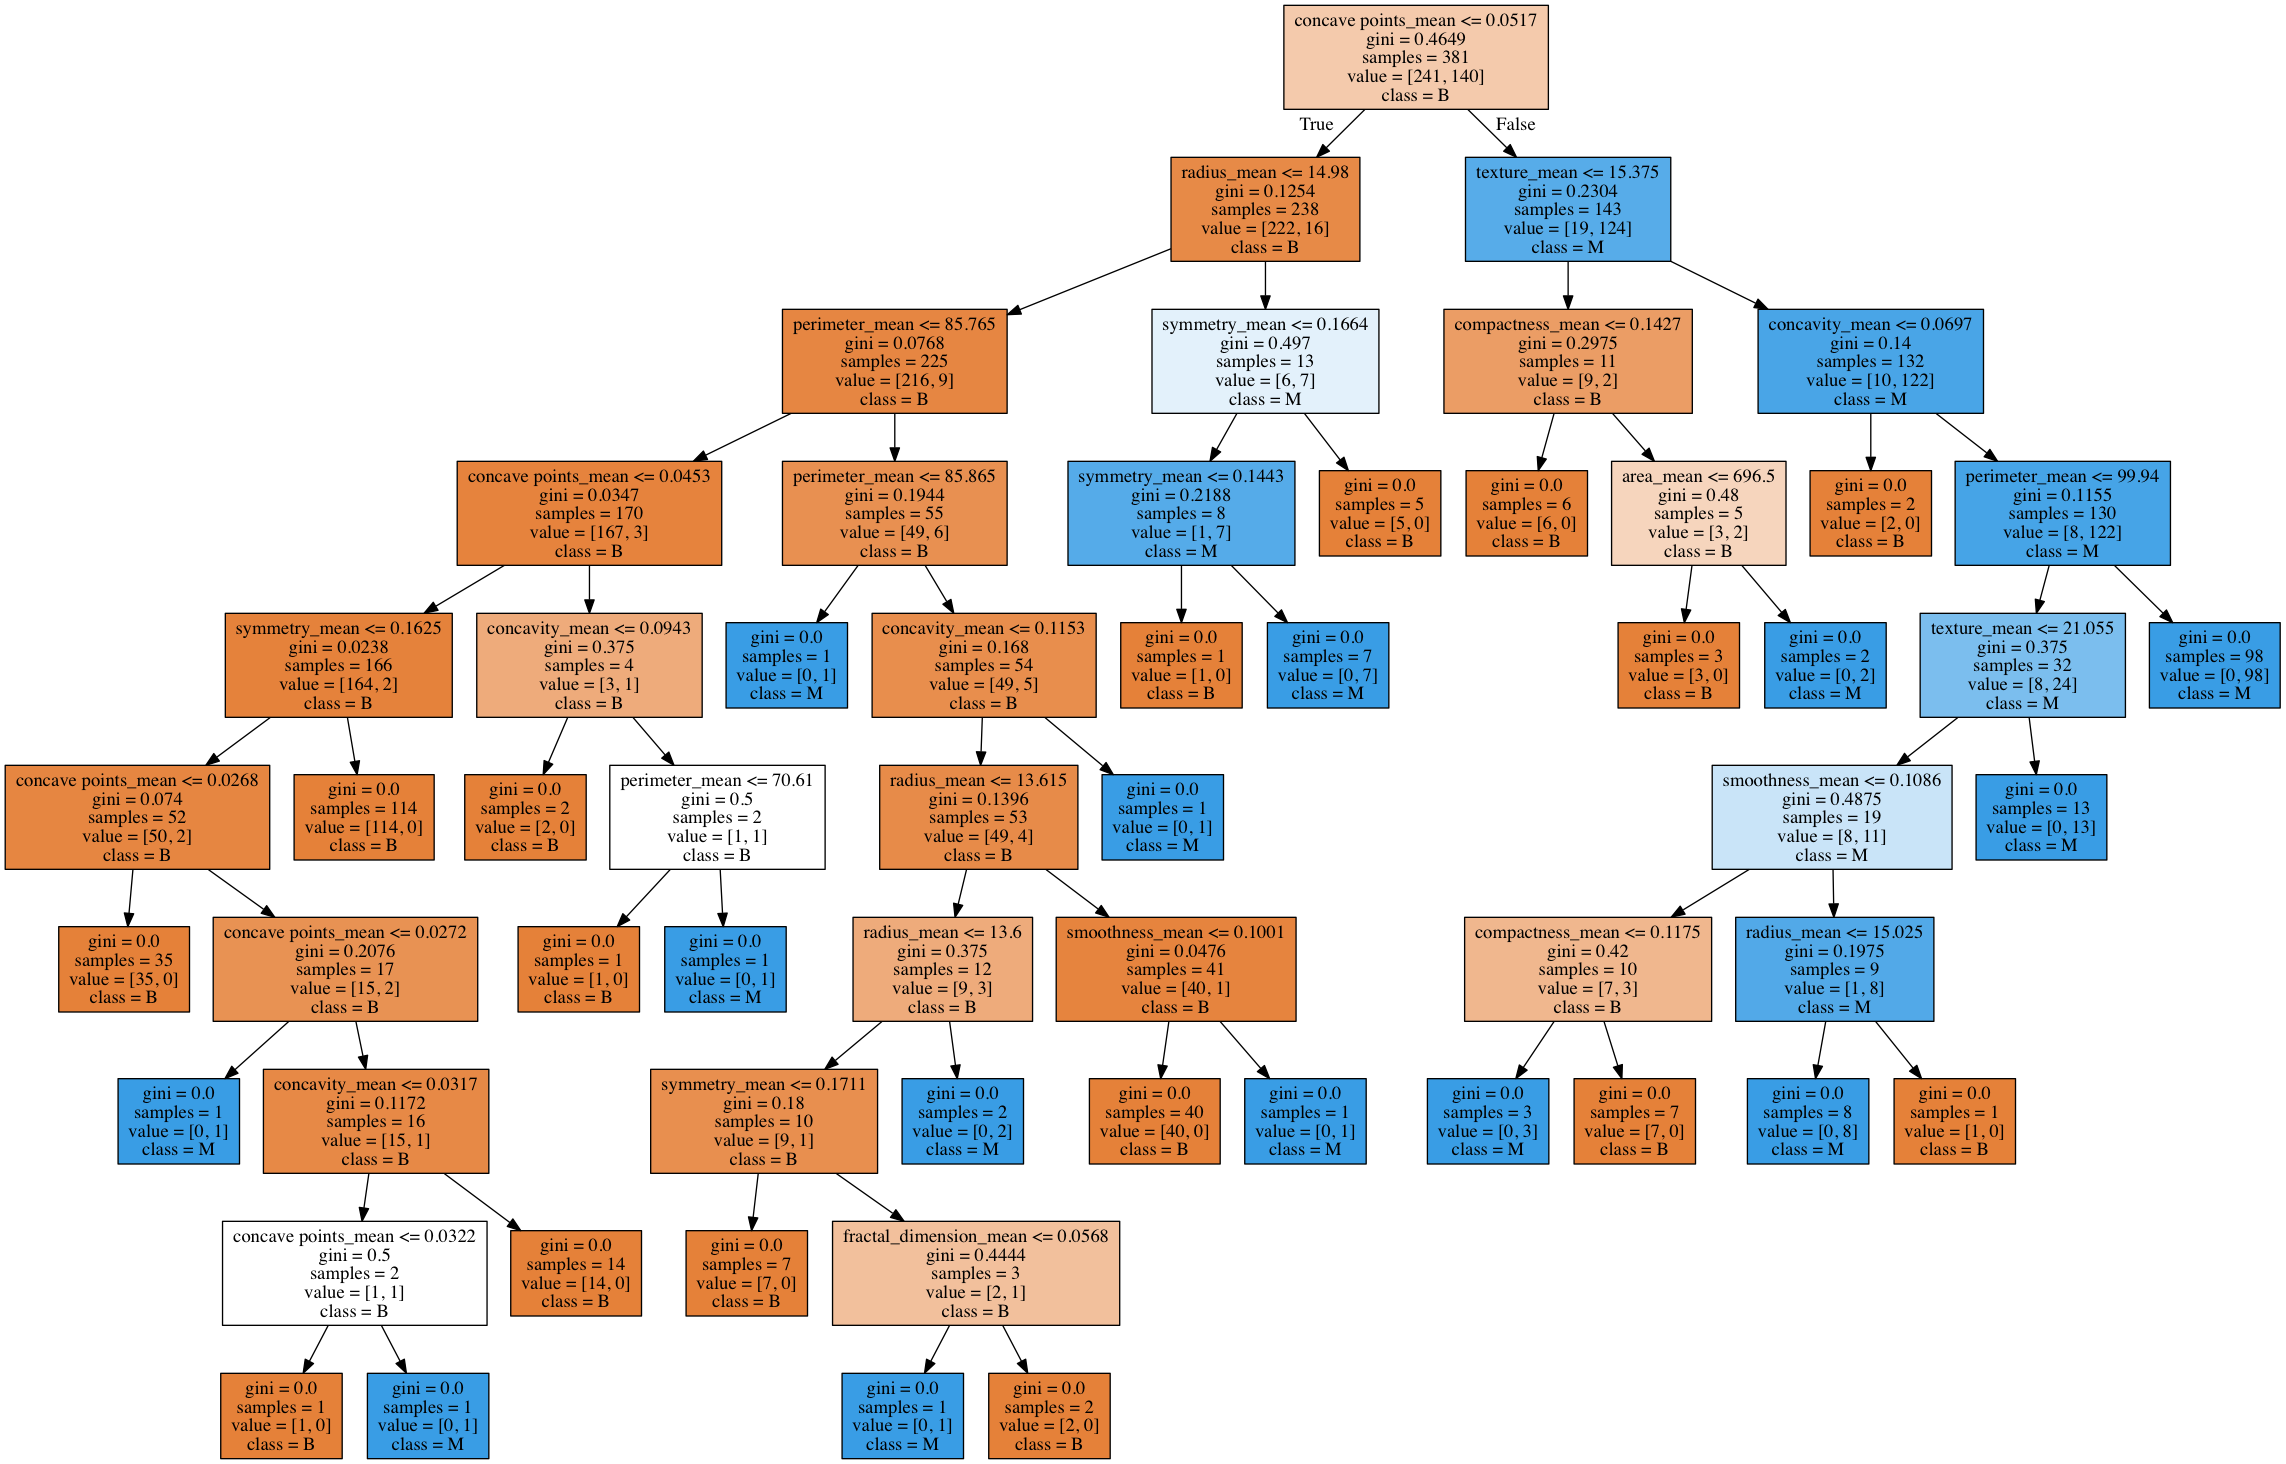

In [240]:
with open("dt.dot", 'w') as f:
    f = tree.export_graphviz(dtc, out_file=f)
dot_data = tree.export_graphviz(dtc, out_file=None, 
                               feature_names=features,
                               class_names=["B","M"],
                               filled=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

# Random Forest

In [217]:
parameter_grid = {'n_estimators': [20, 25, 30],
                  'max_depth': np.logspace(0,2,10),
                  'max_features': list(range(1,11)),
                  'warm_start': [True, False]}
rf = optimize_model(RandomForestClassifier(), parameter_grid)

Accuracy: 0.9543057996485061
Best params: {'n_estimators': 30, 'max_features': 4, 'max_depth': 100.0, 'warm_start': False}


In [220]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100.0, max_features=4, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=30, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [221]:
score = rf.score(X_test,y_test)
print(score)
results["Random Forest"] = score

0.973404255319


# Summary 

In [247]:
results

{'Decision Tree': 0.91489361702127658,
 'Logistic Regression': 0.95744680851063835,
 'Random Forest': 0.97340425531914898,
 'SVM': 0.94680851063829785}

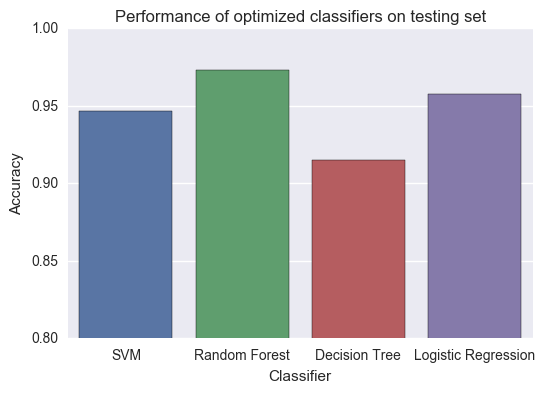

In [250]:
ax = sb.barplot(list(results.keys()), list(results.values()))
ax.set(xlabel='Classifier', ylabel='Accuracy', title="Performance of optimized classifiers on testing set", ylim=(0.8,1))
plt.show()

# Conclusion
### Based on this broad analysis of different classifiers, I find that the Random Forest classifier performs the best on the test data, with accuracy of ~97%. More test data will be required to validate the robustness of the model. 

# Looking ahead
- Obtain/mine a larger dataset- more data > better model
- Try neural networks and deep learning algorithmns
- Build a semi-automated image detection tool that can extract features from cell image to diagnose cells and add to our dataset